In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression


%matplotlib inline	

In [4]:
#download data
file_name = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(file_name)
print('successful')


successful


In [5]:
df.head(5) # view the first 5 rows

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.dtypes # view existing data types

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.shape        

(194673, 38)

<h3>Pre-processing: Balancing Dataset</h3>

The number of null values for severity code is: 0

 1    136485
2     58188
Name: SEVERITYCODE, dtype: int64


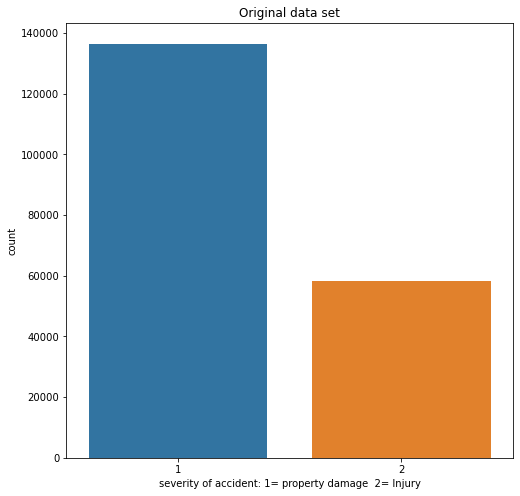

In [6]:
#to check wheather the category has missing values
print("The number of null values for severity code is:", df['SEVERITYCODE'].isnull().sum())
print('\n', df['SEVERITYCODE'].value_counts())

#the plot shows the distribution of SEVERITYCODE before cleaning
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=df)
plt.title('Original data set')
plt.xlabel('severity of accident: 1= property damage  2= Injury')
plt.show()

In [7]:
#TO BALANCE DATASET

# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
df_2 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 2]

#Randomly select 58188 observations from the non-fraud (majority class)
df_1 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == 1].sample(n=58188,random_state=42)

# Concatenate both dataframes again
df_balanced = pd.concat([df_2, df_1])

df_balanced['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,58188
1,58188


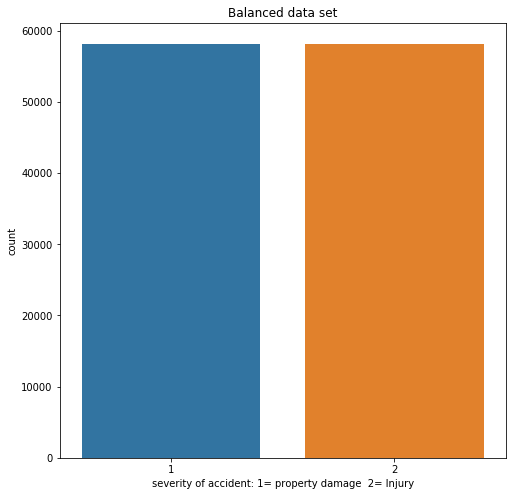

In [9]:
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=df_balanced)
plt.title('Balanced data set')
plt.xlabel('severity of accident: 1= property damage  2= Injury')
plt.show()

In [8]:
df_balanced.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
181980,2,-122.287103,47.511857,204529,327276,328776,E997420,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
1695,2,-122.343494,47.613936,1948,93400,93400,2826196,Matched,Intersection,29547.0,...,Dry,Dark - Street Lights On,NaN,8312036.0,NaN,10,Entering at angle,0,0,N
143631,2,-122.354035,47.517354,159686,193145,193225,E414113,Matched,Intersection,35059.0,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
65001,2,-122.402074,47.582704,71260,85173,85173,2896383,Matched,Intersection,30911.0,...,Dry,Dark - Street Lights On,NaN,8229041.0,NaN,45,Vehicle - Pedalcyclist,0,0,N
159841,2,-122.374857,47.663663,178138,232168,232568,E613735,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N


In [8]:
corr = df_balanced.corr() 
cm = sns.light_palette("green", as_cmap=True) 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.00,0.01,0.02,0.02,0.03,0.03,0.01,1.00,0.14,0.22,0.19,-0.06,0.19,0.01,0.09,0.15
X,0.01,1.00,-0.16,0.01,0.01,0.01,0.12,0.01,0.01,0.01,-0.00,-0.01,0.01,0.00,-0.00,0.02
Y,0.02,-0.16,1.00,-0.02,-0.03,-0.03,-0.11,0.02,-0.02,0.01,0.03,0.01,-0.01,-0.00,0.01,0.01
OBJECTID,0.02,0.01,-0.02,1.00,0.95,0.95,0.05,0.02,-0.07,0.03,0.04,-0.09,-0.02,0.97,0.03,0.07
INCKEY,0.03,0.01,-0.03,0.95,1.00,1.00,0.05,0.03,-0.07,0.03,0.04,-0.10,-0.01,0.99,0.02,0.06
COLDETKEY,0.03,0.01,-0.03,0.95,1.00,1.00,0.05,0.03,-0.07,0.03,0.04,-0.10,-0.01,0.99,0.02,0.06
INTKEY,0.01,0.12,-0.11,0.05,0.05,0.05,1.00,0.01,0.00,-0.00,0.00,-0.01,0.01,0.04,-0.01,0.03
SEVERITYCODE.1,1.00,0.01,0.02,0.02,0.03,0.03,0.01,1.00,0.14,0.22,0.19,-0.06,0.19,0.01,0.09,0.15
PERSONCOUNT,0.14,0.01,-0.02,-0.07,-0.07,-0.07,0.00,0.14,1.00,-0.04,-0.06,0.40,-0.14,0.01,-0.03,-0.05
PEDCOUNT,0.22,0.01,0.01,0.03,0.03,0.03,-0.00,0.22,-0.04,1.00,-0.03,-0.31,0.29,0.03,-0.01,0.56


<h3>Pre-processing: Feature Extraction!</h3> 

In [10]:
df_balanced['INCDATE'].head()

181980    2019/12/21 00:00:00+00
1695      2008/11/07 00:00:00+00
143631    2015/03/06 00:00:00+00
65001     2008/08/16 00:00:00+00
159841    2016/11/14 00:00:00+00
Name: INCDATE, dtype: object

In [9]:
#creating a new attribute as "weekend", whether the incident happens during weekends or weekdays

df_balanced['INCDATE'] = pd.to_datetime(df_balanced['INCDATE'])  #convert to date time object
df_balanced['dayofweek'] = df_balanced['INCDATE'].dt.dayofweek   #returns days of the week, Monday = 0 --sunday =6
df_balanced['weekend'] = df_balanced['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)  #weekend (Friday, Saturday, sunday = 1) or else =0
df_balanced.head()
#df[['INCDATE', 'dayofweek', 'weekend']].head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
181980,2,-122.287103,47.511857,204529,327276,328776,E997420,Matched,Block,NaN,...,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,5,1
1695,2,-122.343494,47.613936,1948,93400,93400,2826196,Matched,Intersection,29547.0,...,NaN,8312036.0,NaN,10,Entering at angle,0,0,N,4,1
143631,2,-122.354035,47.517354,159686,193145,193225,E414113,Matched,Intersection,35059.0,...,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,4,1
65001,2,-122.402074,47.582704,71260,85173,85173,2896383,Matched,Intersection,30911.0,...,NaN,8229041.0,NaN,45,Vehicle - Pedalcyclist,0,0,N,5,1
159841,2,-122.374857,47.663663,178138,232168,232568,E613735,Matched,Block,NaN,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,0,0


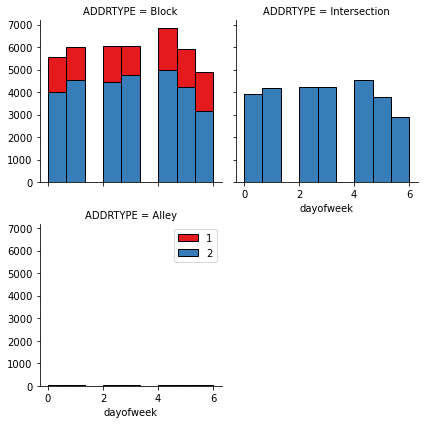

In [12]:

bins = np.linspace(df_balanced.dayofweek.min(), df_balanced.dayofweek.max(), 10)
g = sns.FacetGrid(df_balanced, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


<h3>Handling missing values</h3>

In [10]:
missing_data = df_balanced.isnull()
missing_data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
181980,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
1695,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
143631,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
65001,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
159841,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

SEVERITYCODE
False    116376
Name: SEVERITYCODE, dtype: int64

X
False    113477
True       2899
Name: X, dtype: int64

Y
False    113477
True       2899
Name: Y, dtype: int64

OBJECTID
False    116376
Name: OBJECTID, dtype: int64

INCKEY
False    116376
Name: INCKEY, dtype: int64

COLDETKEY
False    116376
Name: COLDETKEY, dtype: int64

REPORTNO
False    116376
Name: REPORTNO, dtype: int64

STATUS
False    116376
Name: STATUS, dtype: int64

ADDRTYPE
False    115464
True        912
Name: ADDRTYPE, dtype: int64

INTKEY
True     72684
False    43692
Name: INTKEY, dtype: int64

LOCATION
False    115101
True       1275
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     64850
False    51526
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     113694
False      2682
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    116376
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    116376
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    113699
True       2677
Name: COLLI

In [12]:
# replace "?" to NaN
df_balanced.replace("?", np.nan, inplace = True)
df_balanced.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
181980,2,-122.287103,47.511857,204529,327276,328776,E997420,Matched,Block,NaN,...,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,5,1
1695,2,-122.343494,47.613936,1948,93400,93400,2826196,Matched,Intersection,29547.0,...,NaN,8312036.0,NaN,10,Entering at angle,0,0,N,4,1
143631,2,-122.354035,47.517354,159686,193145,193225,E414113,Matched,Intersection,35059.0,...,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,4,1
65001,2,-122.402074,47.582704,71260,85173,85173,2896383,Matched,Intersection,30911.0,...,NaN,8229041.0,NaN,45,Vehicle - Pedalcyclist,0,0,N,5,1
159841,2,-122.374857,47.663663,178138,232168,232568,E613735,Matched,Block,NaN,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,0,0


In [13]:
#removing the rows with missing values in the column
df_balanced.dropna(subset=["WEATHER"], axis=0, inplace=True)

# reset index, because we droped missing rows
df_balanced.reset_index(drop=True, inplace=True)
df_balanced['WEATHER'].isnull().value_counts().to_frame()

,WEATHER
False,113596


In [14]:
#removing the rows with missing values in the column
df_balanced.dropna(subset=["ROADCOND"], axis=0, inplace=True)

# reset index, because we droped two rows
df_balanced.reset_index(drop=True, inplace=True)

In [18]:
df_balanced['ROADCOND'].isnull().value_counts()

False    113568
Name: ROADCOND, dtype: int64

In [15]:
#removing the rows with missing values in the column
df_balanced.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)

# reset index, because we droped missing rows
df_balanced.reset_index(drop=True, inplace=True)
df_balanced['LIGHTCOND'].isnull().value_counts()

False    113452
Name: LIGHTCOND, dtype: int64

In [20]:
df_balanced['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,5967


In [21]:
df_balanced['SEGLANEKEY'].value_counts().head()

0        110885
6532         18
6078         16
10336        13
10342        13
Name: SEGLANEKEY, dtype: int64

In [22]:
df_balanced['CROSSWALKKEY'].value_counts().head()

0         109939
523609        16
525567        13
520838        13
521707        10
Name: CROSSWALKKEY, dtype: int64

In [16]:
print(df_balanced['PEDROWNOTGRNT'].value_counts().to_frame())

print("\n" , df_balanced['PEDROWNOTGRNT'].isnull().value_counts().to_frame())

   PEDROWNOTGRNT
Y           4403

        PEDROWNOTGRNT
True          109049
False           4403


In [17]:
df_balanced['LIGHTCOND'].isnull().value_counts().to_frame()

,LIGHTCOND
False,113452


In [18]:
#Standardizing and Encoding Attribute Values

print("Attribute values before standardizing data:", df_balanced['UNDERINFL'].value_counts().to_frame())

#print("\n" , df_balanced['UNDERINFL'].isnull().value_counts().to_frame())

df_balanced['UNDERINFL'].replace("0", "N", inplace = True)
df_balanced['UNDERINFL'].replace("1", "Y", inplace = True)

print("\n\nAttribute values ater standardizing data:", df_balanced['UNDERINFL'].value_counts().to_frame())

Attribute values before standardizing data:    UNDERINFL
N      60018
0      47554
Y       3245
1       2635


Attribute values ater standardizing data:    UNDERINFL
N     107572
Y       5880


In [19]:
print(df_balanced['INATTENTIONIND'].value_counts().to_frame())

print("\n" , df_balanced['INATTENTIONIND'].isnull().value_counts().to_frame())

   INATTENTIONIND
Y           18604

        INATTENTIONIND
True            94848
False           18604


In [20]:
#replace the missing values with "N"
df_balanced['INATTENTIONIND'].replace(np.nan,"N", inplace = True) 
print(df_balanced['INATTENTIONIND'].value_counts().to_frame())

   INATTENTIONIND
N           94848
Y           18604


In [21]:
print(df_balanced['COLLISIONTYPE'].value_counts().to_frame())

print("\n" , df_balanced['COLLISIONTYPE'].isnull().value_counts().to_frame())

            COLLISIONTYPE
Rear Ended          22923
Angles              22574
Parked Car          21879
Other               13536
Sideswipe            9447
Left Turn            8877
Pedestrian           6211
Cycles               5026
Right Turn           1615
Head On              1347

        COLLISIONTYPE
False         113435
True              17


In [22]:
#removing the rows with missing values in the column
df_balanced.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)

# reset index, because we droped missing rows
df_balanced.reset_index(drop=True, inplace=True)

In [23]:
df_balanced['COLLISIONTYPE'].isnull().value_counts()

False    113435
Name: COLLISIONTYPE, dtype: int64

In [24]:
print(df_balanced['ADDRTYPE'].value_counts().to_frame())

print("\n" , df_balanced['ADDRTYPE'].isnull().value_counts().to_frame())

              ADDRTYPE
Block            69491
Intersection     42730
Alley              358

        ADDRTYPE
False    112579
True        856


In [25]:
#removing the rows with missing values in the column
df_balanced.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)

# reset index, because we droped missing rows
df_balanced.reset_index(drop=True, inplace=True)

In [26]:
df_balanced['ADDRTYPE'].isnull().value_counts()

False    112579
Name: ADDRTYPE, dtype: int64

In [27]:
df_balanced.shape

(112579, 40)

In [36]:
df_balanced.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,dayofweek,weekend
0,2,-122.287103,47.511857,204529,327276,328776,E997420,Matched,Block,NaN,...,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,5,1
1,2,-122.343494,47.613936,1948,93400,93400,2826196,Matched,Intersection,29547.0,...,NaN,8312036.0,NaN,10,Entering at angle,0,0,N,4,1
2,2,-122.354035,47.517354,159686,193145,193225,E414113,Matched,Intersection,35059.0,...,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N,4,1
3,2,-122.402074,47.582704,71260,85173,85173,2896383,Matched,Intersection,30911.0,...,NaN,8229041.0,NaN,45,Vehicle - Pedalcyclist,0,0,N,5,1
4,2,-122.374857,47.663663,178138,232168,232568,E613735,Matched,Block,NaN,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,0,0


In [28]:
df_balanced_feature = df_balanced[["ADDRTYPE", "COLLISIONTYPE", "INATTENTIONIND", "UNDERINFL", "LIGHTCOND", "ROADCOND", "WEATHER", "weekend", "SEVERITYCODE"]]
df_balanced_feature.head()

,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,LIGHTCOND,ROADCOND,WEATHER,weekend,SEVERITYCODE
0,Block,Sideswipe,N,N,Daylight,Wet,Raining,1,2
1,Intersection,Angles,N,N,Dark - Street Lights On,Dry,Overcast,1,2
2,Intersection,Rear Ended,N,N,Daylight,Dry,Clear,1,2
3,Intersection,Cycles,Y,N,Dark - Street Lights On,Dry,Clear,1,2
4,Block,Angles,Y,N,Daylight,Dry,Clear,0,2


In [38]:
df_balanced_feature.dtypes

ADDRTYPE          object
COLLISIONTYPE     object
INATTENTIONIND    object
UNDERINFL         object
LIGHTCOND         object
ROADCOND          object
WEATHER           object
weekend            int64
SEVERITYCODE       int64
dtype: object

In [29]:
#describe all the cleaned data
df_balanced_feature.describe(include=['object'])  

,ADDRTYPE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,LIGHTCOND,ROADCOND,WEATHER
count,112579,112579,112579,112579,112579,112579,112579
unique,3,10,2,2,9,9,11
top,Block,Rear Ended,N,N,Daylight,Dry,Clear
freq,69491,22765,94054,106718,71439,75664,67658


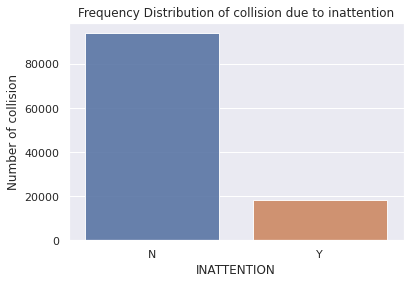

In [40]:
weather_count = df_balanced_feature['INATTENTIONIND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(weather_count.index, weather_count.values, alpha=0.9)
plt.title('Frequency Distribution of collision due to inattention')
plt.ylabel('Number of collision', fontsize=12)
plt.xlabel('INATTENTION', fontsize=12)
plt.show()

<h3>Encoding</h3>

In [30]:
#to convert categorical varibales to numerical values

from sklearn import preprocessing

X = df_balanced_feature[['ADDRTYPE', 'COLLISIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'LIGHTCOND', 'ROADCOND', 'WEATHER', 'weekend']].values
X[0:5]

array([['Block', 'Sideswipe', 'N', 'N', 'Daylight', 'Wet', 'Raining', 1],
       ['Intersection', 'Angles', 'N', 'N', 'Dark - Street Lights On',
        'Dry', 'Overcast', 1],
       ['Intersection', 'Rear Ended', 'N', 'N', 'Daylight', 'Dry',
        'Clear', 1],
       ['Intersection', 'Cycles', 'Y', 'N', 'Dark - Street Lights On',
        'Dry', 'Clear', 1],
       ['Block', 'Angles', 'Y', 'N', 'Daylight', 'Dry', 'Clear', 0]],
      dtype=object)

In [31]:
le_ADDRTYPE = preprocessing.LabelEncoder()
le_ADDRTYPE.fit(['Block','Intersection', 'Alley'])
X[:,0] = le_ADDRTYPE.transform(X[:,0]) 


le_COLLISIONTYPE = preprocessing.LabelEncoder()
le_COLLISIONTYPE.fit([ 'Rear Ended', 'Angles', 'Parked Car', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'])
X[:,1] = le_COLLISIONTYPE.transform(X[:,1])
      

le_INATTENTIONIND = preprocessing.LabelEncoder()
le_INATTENTIONIND.fit([ 'N', 'Y'])
X[:,2] = le_INATTENTIONIND.transform(X[:,2]) 


le_UNDERINFL = preprocessing.LabelEncoder()
le_UNDERINFL.fit([ 'N', 'Y'])
X[:,3] = le_UNDERINFL.transform(X[:,3]) 



le_LIGHTCOND = preprocessing.LabelEncoder()
le_LIGHTCOND.fit([ 'Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,4] = le_LIGHTCOND.transform(X[:,4]) 


le_ROADCOND = preprocessing.LabelEncoder()
le_ROADCOND.fit([ 'Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Oil', 'Sand/Mud/Dirt'])
X[:,5] = le_ROADCOND.transform(X[:,5])        


le_WEATHER = preprocessing.LabelEncoder()
le_WEATHER.fit([ 'Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy' ])
X[:,6] = le_WEATHER.transform(X[:,6]) 
      


X[0:5]

array([[1, 9, 0, 0, 5, 8, 6, 1],
       [2, 0, 0, 0, 2, 0, 4, 1],
       [2, 7, 0, 0, 5, 0, 1, 1],
       [2, 1, 1, 0, 2, 0, 1, 1],
       [1, 0, 1, 0, 5, 0, 1, 0]], dtype=object)

In [32]:
y = df_balanced_feature['SEVERITYCODE']
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: SEVERITYCODE, dtype: int64

In [33]:
#use y_cat for decision tree, because decision tree can handle string/object values as category
y_cat = y.astype("str")
y_cat.head()

0    2
1    2
2    2
3    2
4    2
Name: SEVERITYCODE, dtype: object

<h3>Decision Tree Modeling</h3>

In [34]:
#setting up decision tree modeling

from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_cat, test_size=0.3, random_state=3)
print("train set x:", X_trainset.shape)
print("train set y:", y_trainset.shape)

print("\ntest set x:", X_testset.shape)
print("test set y:", y_testset.shape)

train set x: (78805, 8)
train set y: (78805,)

test set x: (33774, 8)
test set y: (33774,)


In [35]:
# to check the number of target variable in test data set
#convert numpy array to data frame

numpy_data = X_testset         
df_t = pd.DataFrame(data=numpy_data)
df_t[7].value_counts()  #no of weekend and non-weekend in test set

0    19701
1    14073
Name: 7, dtype: int64

In [36]:
#y_test_dataset, checking the values for target variable 
df_t_y = pd.DataFrame(y_testset)   #convert numpy array to dataframe
df_t_y['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
2,17226
1,16548


In [37]:
from sklearn.tree import DecisionTreeClassifier

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [38]:
Tree.fit(X_trainset,y_trainset)
predTree = Tree.predict(X_testset)

In [39]:
print (predTree [0:5])
print (y_testset [0:5])

['1' '1' '2' '2' '1']
78122     1
98078     1
39478     2
108569    1
27501     2
Name: SEVERITYCODE, dtype: object


In [40]:
from sklearn import metrics
from sklearn.metrics import f1_score
#import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
print("f1 score         :", f1_score(y_testset, predTree, average = 'weighted'))

DecisionTrees's Accuracy:  0.703470124948185
f1 score         : 0.7019290921599218


In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_testset, predTree))
print(classification_report(y_testset, predTree))

Confusion Matrix:
[[10485  6063]
 [ 3952 13274]]
              precision    recall  f1-score   support

           1       0.73      0.63      0.68     16548
           2       0.69      0.77      0.73     17226

    accuracy                           0.70     33774
   macro avg       0.71      0.70      0.70     33774
weighted avg       0.71      0.70      0.70     33774



In [53]:
df_decision_op=pd.DataFrame({'Actual':y_testset, 'Predicted':predTree})
df_decision_op.head(10)

,Actual,Predicted
78122,1,1
98078,1,1
39478,2,2
108569,1,2
27501,2,1
18423,2,2
111249,1,2
54714,2,2
1578,2,2
66622,1,1


In [ ]:
#visualization

!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | 

In [85]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

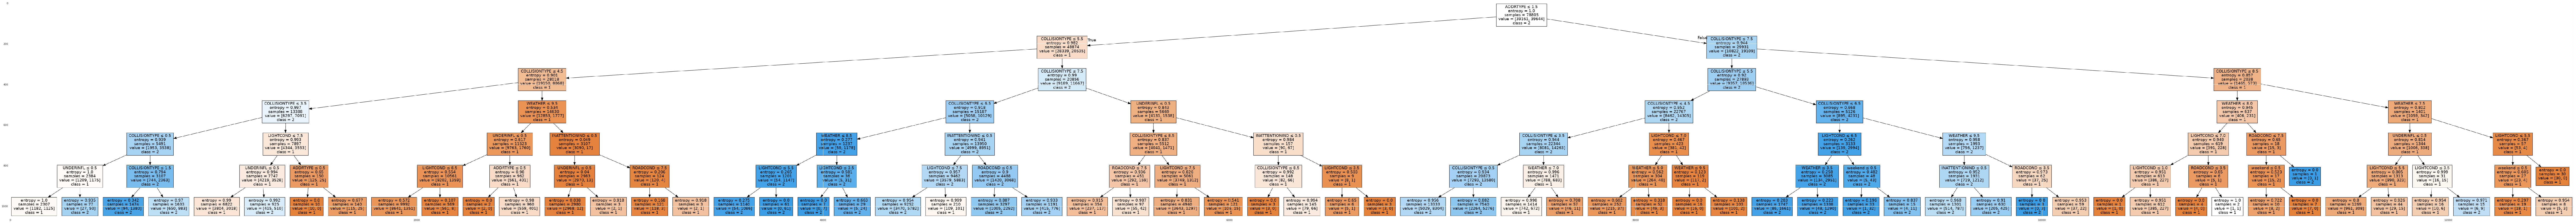

In [105]:
dot_data = StringIO()
filename = "car_severity_tree.png"     # it saves the outcome in "car_severity_tree.png"
featureNames = df_balanced_feature.columns[0:8]
targetNames = df_balanced_feature["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 200))
plt.imshow(img,interpolation='nearest')

<h3>Normalize values</h3>

In [41]:
#normalize data

X_norm = preprocessing.StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-0.76655563,  1.63073608, -0.44380324, -0.23435111,  0.40127764,
         1.5112397 ,  1.15423911,  1.18105471],
       [ 1.2701211 , -1.5211402 , -0.44380324, -0.23435111, -1.44093839,
        -0.68847429,  0.40603151,  1.18105471],
       [ 1.2701211 ,  0.93031913, -0.44380324, -0.23435111,  0.40127764,
        -0.68847429, -0.71627989,  1.18105471],
       [ 1.2701211 , -1.17093172,  2.25325076, -0.23435111, -1.44093839,
        -0.68847429, -0.71627989,  1.18105471],
       [-0.76655563, -1.5211402 ,  2.25325076, -0.23435111,  0.40127764,
        -0.68847429, -0.71627989, -0.84670083]])

<h3>Train/Test data set</h3>

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90063, 8) (90063,)
Test set: (22516, 8) (22516,)


<h3>Logistic Regression Modeling</h3>

In [43]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [44]:
yhat_LR = LR.predict(X_test)
yhat_LR

array([2, 2, 2, ..., 1, 1, 1])

In [45]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.34706476, 0.65293524],
       [0.43647445, 0.56352555],
       [0.34706476, 0.65293524],
       ...,
       [0.57784245, 0.42215755],
       [0.63173308, 0.36826692],
       [0.53169044, 0.46830956]])

In [46]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print("Jaccard similarity is:  %.4f"%  jaccard_score(y_test, yhat_LR))
print("log loss is:     %.4f"%  log_loss(y_test, yhat_prob))
print("f1 score:        %.4f"%  f1_score(y_test, yhat_LR, average = 'weighted'))

Jaccard similarity is:  0.4494
log loss is:     0.6563
f1 score:        0.6117


<h3>K-nearest neighborhood</h3>

[0.59850773 0.63625866 0.6439865  0.63714692 0.67254397 0.66663706
 0.6768076  0.64403091 0.67338781 0.65588915 0.68435779 0.66335051
 0.66868005 0.66548232]


Using test/train set: the best accuracy is  0.6843577900159886 with k= 11


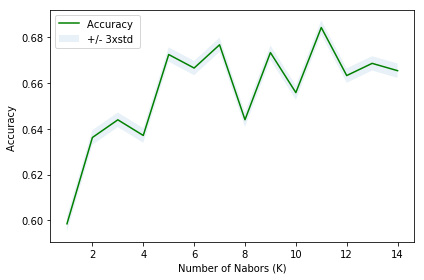

In [26]:
#method  to find the best k

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat= KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

print( "\n\nUsing test/train set: the best accuracy is ", mean_acc.max(), "with k=", mean_acc.argmax()+1)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [28]:
#KNN modeling
from sklearn import metrics
from sklearn.metrics import f1_score

print('The best k based on method 1 is 11')
KNN_best = KNeighborsClassifier(n_neighbors = 11).fit(X_train,y_train)
yhat_KNN= KNN_best.predict(X_test)
print('\nfirst 5 predicted values:', yhat_KNN[0:5])

#Testing model with split test data
print("\nJaccard accuracy:", metrics.accuracy_score(y_test, yhat_KNN))
print("f1 score         :", f1_score(y_test, yhat_KNN, average = 'weighted'))


The best k based on method 1 is 11

first 5 predicted values: [2 1 2 2 1]

Jaccard accuracy: 0.6843577900159886
f1 score         : 0.6818961708774333
